# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


In [3]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


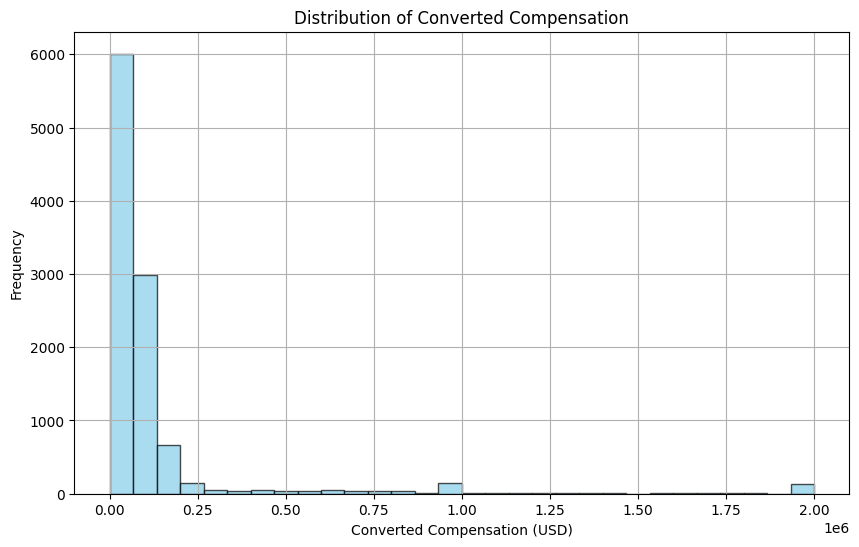

In [4]:
import matplotlib.pyplot as plt

# Plot the distribution curve for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Plot the histogram for the column `ConvertedComp`.


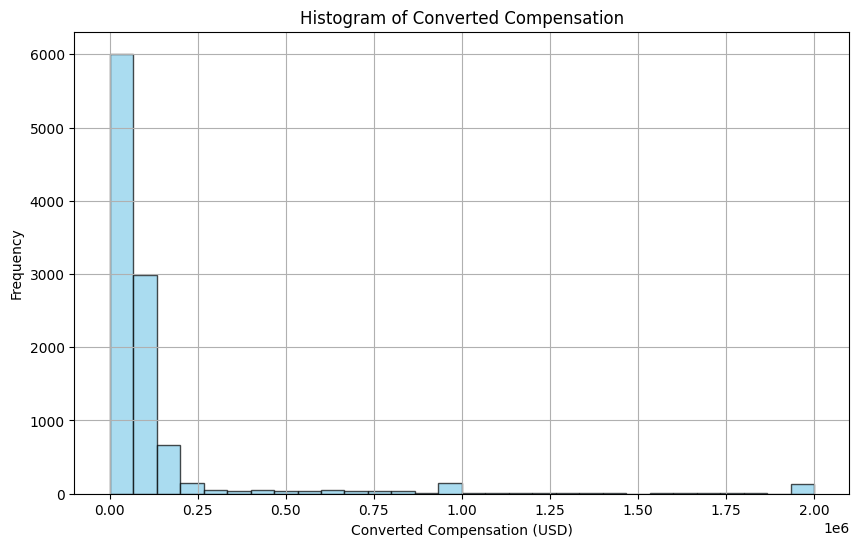

In [5]:
# Plot the histogram for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


What is the median of the column `ConvertedComp`?


In [6]:
# Calculate the median of the column 'ConvertedComp'
median_converted_comp = df['ConvertedComp'].median()

print("Median of the column 'ConvertedComp':", median_converted_comp)



Median of the column 'ConvertedComp': 57745.0


How many responders identified themselves only as a **Man**?


In [7]:
# Count the number of respondents who identified themselves only as a man
num_man_only = df[df['Gender'] == 'Man'].shape[0]

print("Number of responders who identified themselves only as a Man:", num_man_only)

Number of responders who identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# Filter the DataFrame for responders identified as Woman
woman_responses = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for responders identified as Woman
median_converted_comp_woman = woman_responses['ConvertedComp'].median()

print("Median ConvertedComp of responders identified themselves only as a Woman:", median_converted_comp_woman)

Median ConvertedComp of responders identified themselves only as a Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# Calculate the five-number summary for the column 'Age'
five_num_summary_age = df['Age'].describe(percentiles=[.25, .5, .75])

print("Five-number summary for the column 'Age':")
print(five_num_summary_age[['min', '25%', '50%', '75%', 'max']])


Five-number summary for the column 'Age':
min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


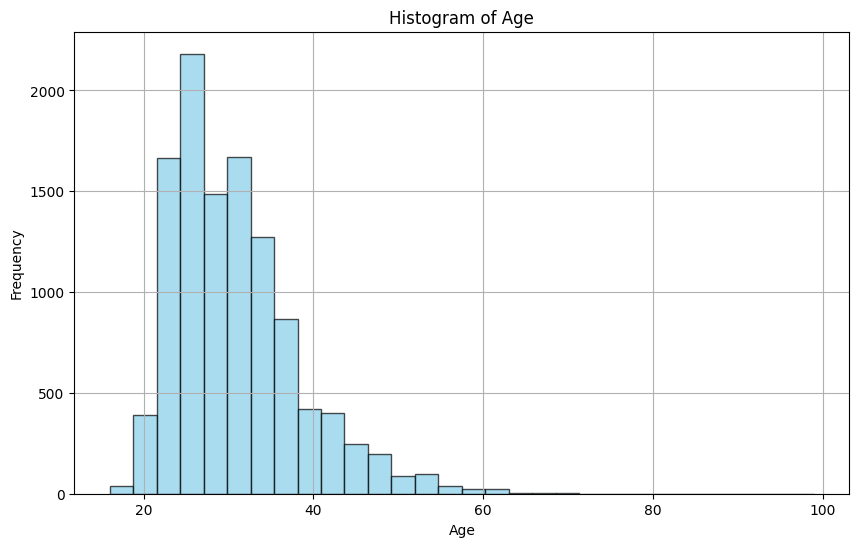

In [10]:
import matplotlib.pyplot as plt

# Plot a histogram of the column 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [11]:
# Calculate the median age of survey respondents
median_age = df['Age'].median()

print("Median age of survey respondents:", median_age)

Median age of survey respondents: 29.0


In [12]:
# Filter the DataFrame to include only respondents who have identified themselves as 'Woman'
woman_df = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for 'Woman' respondents
median_converted_comp_woman = woman_df['ConvertedComp'].median()

print("Median ConvertedComp of respondents who identified themselves as 'Woman':", median_converted_comp_woman)

Median ConvertedComp of respondents who identified themselves as 'Woman': 57708.0


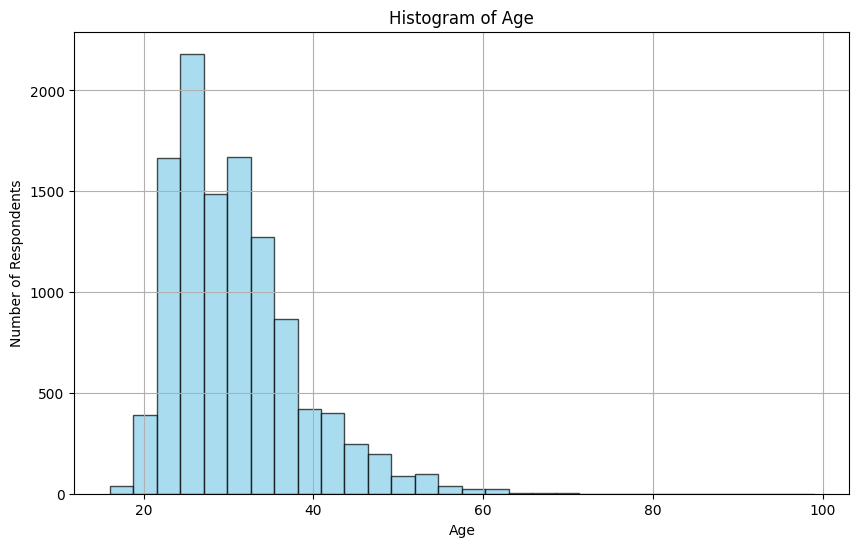

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


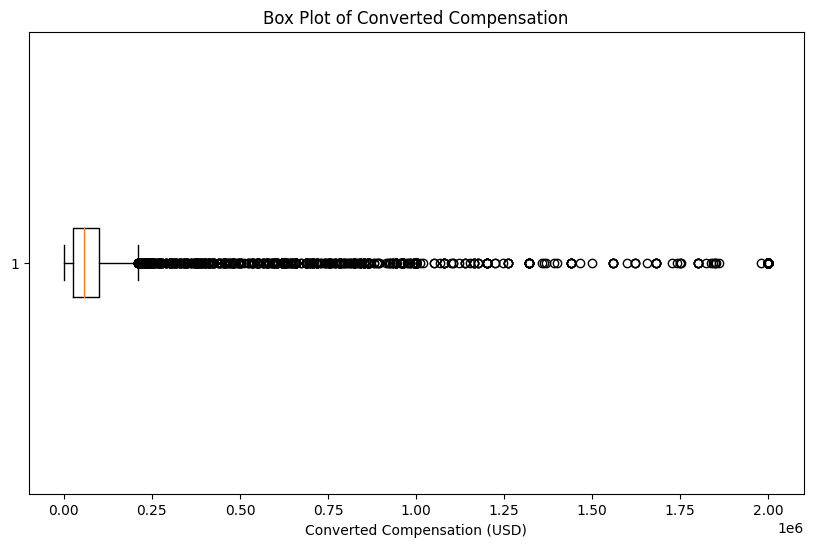

In [14]:
# Create a box plot for the column 'ConvertedComp'
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# Calculate the first quartile (Q1) and third quartile (Q3) of the column 'ConvertedComp'
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

print("Interquartile Range (IQR) for the column 'ConvertedComp':", IQR)

Interquartile Range (IQR) for the column 'ConvertedComp': 73132.0


Find out the upper and lower bounds.


In [16]:
# Calculate the upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper bound for outliers:", upper_bound)
print("Lower bound for outliers:", lower_bound)

Upper bound for outliers: 209698.0
Lower bound for outliers: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# Count the number of outliers in the column 'ConvertedComp'
num_outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)].shape[0]

print("Number of outliers in the 'ConvertedComp' column:", num_outliers)

Number of outliers in the 'ConvertedComp' column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# Filter the original DataFrame to remove outliers from the 'ConvertedComp' column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Display the first few rows of the new DataFrame
print(df_no_outliers.head())

   Respondent                      MainBranch Hobbyist  \
0           4  I am a developer by profession       No   
1           9  I am a developer by profession      Yes   
2          13  I am a developer by profession      Yes   
4          17  I am a developer by profession      Yes   
5          19  I am a developer by profession      Yes   

                                         OpenSourcer  \
0                                              Never   
1                         Once a month or more often   
2  Less than once a month but more than once per ...   
4  Less than once a month but more than once per ...   
5                                              Never   

                                          OpenSource          Employment  \
0  The quality of OSS and closed source software ...  Employed full-time   
1  The quality of OSS and closed source software ...  Employed full-time   
2  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4  The qua

In [19]:
# Calculate the median ConvertedComp before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()

print("Median ConvertedComp before removing outliers:", median_converted_comp_before)

Median ConvertedComp before removing outliers: 57745.0


In [20]:
# Calculate the median ConvertedComp after removing outliers
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

print("Median ConvertedComp after removing outliers:", median_converted_comp_after)

Median ConvertedComp after removing outliers: 52704.0


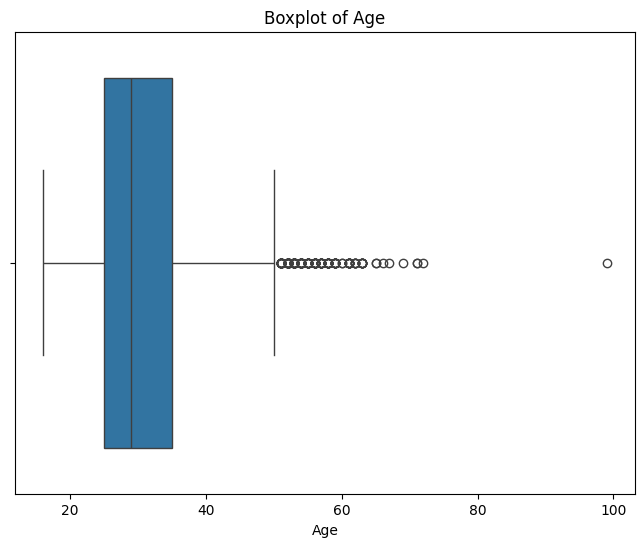

In [21]:
import seaborn as sns

# Create a boxplot of the 'Age' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

In [22]:
# Get the summary statistics of the 'Age' column
age_stats = df['Age'].describe()

# Count the number of outliers below Q1
num_outliers_below_Q1 = age_stats['count'] - age_stats['25%']

print("Number of outliers below Q1:", num_outliers_below_Q1)

Number of outliers below Q1: 11086.0


In [23]:
# Calculate the mean ConvertedComp after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)

Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [24]:
# Calculate the correlation between 'Age' and all other numerical columns
correlation = df.corr()['Age']

# Print the correlation values
print(correlation)

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


<ipython-input-24-f2c9025cfb74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Age']


In [25]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation coefficients between "Age" and all other columns
age_correlation = correlation_matrix['Age'].drop('Age')  # Exclude correlation with itself

# Find the column with the lowest correlation coefficient (indicating a negative correlation)
column_with_negative_correlation = age_correlation.idxmin()

print("Column with a negative correlation with 'Age':", column_with_negative_correlation)


Column with a negative correlation with 'Age': CodeRevHrs


<ipython-input-25-1feeb606950e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [26]:
# Find the column with the highest correlation coefficient
column_with_highest_correlation = age_correlation.idxmax()

print("Column with the highest correlation with 'Age':", column_with_highest_correlation)


Column with the highest correlation with 'Age': ConvertedComp
